First, we have to import the functions and packages relevant to our script

In [2]:
import numpy as np  # whole numpy lib is available, prepend 'np.'
from numpy import average, std
from numpy.random import random, randint, normal, shuffle,uniform
import os  # handy system and path functions
import sys  # to get file system encoding
import csv
from pandas import DataFrame, read_csv
import matplotlib.pyplot as plt
import pandas as pd  
import matplotlib
print('Python version ' + sys.version)
print('Pandas version ' + pd.__version__)
print('Matplotlib version ' + matplotlib.__version__)


Python version 3.6.3 |Anaconda, Inc.| (default, Oct 15 2017, 03:27:45) [MSC v.1900 64 bit (AMD64)]
Pandas version 0.20.3
Matplotlib version 2.1.0


Now we're going to want to pull up an example of one .csv results file and extract its data

In [3]:
cue_conditions=['target','distractor','neutral']
valid_conds=[0.5,0.8]
numTrials=33
subjects=['99']
sessions=3
#path to .csv result files with our mock data 
where_files = r'C:\Users\dillc\University of Iowa\Hwang Lab - Documents\Alpha Paradigm\scripts\data'

# First, we'll look at the results of one subject

In [4]:
results = pd.read_csv(where_files +r'\99_alpha_pilot_01_2018.csv') #https://www.tutorialspoint.com/python_pandas/python_pandas_dataframe.htm
#results.fillna('')
#results.columns

In [5]:
block_results=results.iloc[1:,4:]
#block_results
#block_results.fillna('')

In [6]:
#extracting overall accuracy
accALL=(np.sum(block_results['trialCorr?'])/165)
accALL

0.8848484848484849

Have to convert the RT dtype to floats instead of strings

In [7]:
block_results['RT']=block_results['RT'].replace('None',0)
block_results['RT']=block_results.RT.astype(float)

In [8]:
#overall mean
RTall=np.mean(block_results['RT'])
RTall

0.8438402787100516

# Now, we'll look at data within subjects as well as across them

We want to look at condition-by-condition data, because averages across conditions aren't super informative on their own

In [15]:
# want to grab the indices of each condtion row and what condition it is (cue type AND validity)

data=pd.DataFrame()
data_row_labels=[]

for sub in subjects:
    print('subject '+str(sub)+':')
    for session in range(sessions):
        print('##### session '+str(session+1)+' #####')
        
        results = pd.read_csv(where_files +r'\%s_alpha_pilot_0%d_2018.csv'% (sub,(session+1)))
        block_results=results.iloc[1:,4:]
        block_results['RT']=block_results['RT'].replace('None',0)
        block_results['RT']=block_results.RT.astype(float)
        
        conds_indices={}
        for cue in cue_conditions: #loop through the cue categories and find their indices
            inds=block_results['cue'][block_results['cue']==cue].index
            #print(cue)
            #print(inds)
            for valid in valid_conds: #once we find the cue indices we still need to know the validity for those cue blocks
                if cue=='neutral' and inds.any():
                    conds_indices['neutral']=inds #neutral cues always have validity of 0 
                else:    
                    for ind in inds:
                        if block_results['validity'][ind]==valid:
                            conds_indices.setdefault((cue+str(valid)),[]).append(ind)
        #print(conds_indices) 

        ### now we have a dictionary of each condtion's indices in the DataFrame, so we next want to extract the data for each ###

        for cond in conds_indices.keys():
            print(cond+':')
            RTs=[]
            for ind in conds_indices[cond]: #slicing the series 'RT' by the indices of ea condition to grab out the RT's for this cond
                slce=block_results['RT'][(ind-1):(ind+(numTrials-1))]
                RTs.append(slce)
            cond_RT=pd.concat(RTs)
            print('mean RT: '+str(np.mean(cond_RT)))
            print('standard dev of RT: '+str(np.std(cond_RT)))
            ACCs=[]
            for ind in conds_indices[cond]: #slicing the series 'RT' by the indices of ea condition to grab out the RT's for this cond
                slce=block_results['trialCorr?'][(ind-1):(ind+(numTrials-1))]
                ACCs.append(slce)
            cond_ACC=pd.concat(ACCs)
            print('acc: '+str(np.mean(cond_ACC)))
            print('\n')
            data2=pd.DataFrame([[np.mean(cond_RT),np.std(cond_RT),np.mean(cond_ACC)]],columns=['meanRT','stdRT','meanACC'])
            data=data.append(data2)
            data_row_labels.append(sub+'s'+str(session+1)+' '+cond)

data.index=(data_row_labels)

subject 99:
##### session 1 #####
target0.5:
mean RT: 0.8119709620002664
standard dev of RT: 0.2374912871959076
acc: 0.8787878787878788


target0.8:
mean RT: 0.8431061725471712
standard dev of RT: 0.20788688729234286
acc: 0.9090909090909091


distractor0.5:
mean RT: 0.9298115108443502
standard dev of RT: 0.2802179522400999
acc: 1.0


distractor0.8:
mean RT: 0.8941386995725087
standard dev of RT: 0.2948363007707853
acc: 0.8181818181818182


neutral:
mean RT: 0.7401740485859618
standard dev of RT: 0.22309704241857353
acc: 0.8181818181818182


##### session 2 #####
target0.5:
mean RT: 0.7743502302941069
standard dev of RT: 0.19008069455340842
acc: 0.9696969696969697


target0.8:
mean RT: 0.7664571167538683
standard dev of RT: 0.16481630648745232
acc: 0.9393939393939394


distractor0.5:
mean RT: 0.8470242070898442
standard dev of RT: 0.1713615115388313
acc: 0.9393939393939394


distractor0.8:
mean RT: 0.8025405645087382
standard dev of RT: 0.14403240266290224
acc: 1.0


neutral:
mean RT: 0

In [16]:
data

,meanRT,stdRT,meanACC
99s1 target0.5,0.811971,0.237491,0.878788
99s1 target0.8,0.843106,0.207887,0.909091
99s1 distractor0.5,0.929812,0.280218,1.000000
99s1 distractor0.8,0.894139,0.294836,0.818182
99s1 neutral,0.740174,0.223097,0.818182
99s2 target0.5,0.774350,0.190081,0.969697
99s2 target0.8,0.766457,0.164816,0.939394
99s2 distractor0.5,0.847024,0.171362,0.939394
99s2 distractor0.8,0.802541,0.144032,1.000000
99s2 neutral,0.800688,0.171590,0.939394


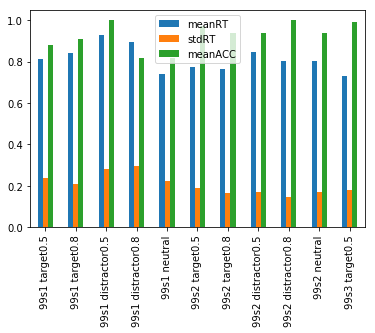

In [20]:
#plot=data['meanRT'].plot(kind='bar')
plot=data.plot(kind='bar')
plt.show()

In [1]:
# Data for plotting

meanRTs_tar5=(0.8119,0.77435,0.73282)
meanRTs_tar8=(0.84310,0.766457,0.83333)#last num is fake
meanRTs_dis5=(0.929811,0.84702,0.86532)#last num is fake
meanRTs_dis8=(0.894138,0.8025405,0.8506)#last num is fake
meanRTs_neutral=(0.74017,0.8006,0.7899)#last num is fake

plt.figure(figsize=(20,40))
fig, ax = plt.subplots()

ax.set(xlabel='conditions', ylabel='RT',
title='across sessions')
index=np.arange(3)
bar_width=0.15
opacity=0.5

a=plt.bar(index, meanRTs_tar5, bar_width,
                 alpha=opacity,
                 color='b',
                 label='tar5')
b=plt.bar(index+bar_width, meanRTs_tar8, bar_width,
                 alpha=opacity,
                 color='g',
                 label='tar8')
c=plt.bar(index+(bar_width*2), meanRTs_dis5, bar_width,
                 alpha=opacity,
                 color='c',
                 label='dis5')
d=plt.bar(index+(bar_width*3), meanRTs_dis8, bar_width,
                 alpha=opacity,
                 color='r',
                 label='dis8')
e=plt.bar(index+(bar_width*4), meanRTs_neutral, bar_width,
                 alpha=opacity,
                 color='k',
                 label='neutral')

#x=['s1t0.5','s1t0.8','s1d0.5','s1d0.8','s1n','s2t0.5','s2t0.8','s2d0.5','s2d0.8','s2n','s3t0.5','s3t0.8','s3d0.5','s3d0.8','s3n']
plt.xticks(index,('s1','s2','s3'))
#y=[]
plt.legend(loc="lower right")
#plt.tight_layout()
plt.show()

NameError: name 'plt' is not defined